### Import necessary liabraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Load the data set

In [2]:
df=pd.read_csv("D:\Datatrained projects\data\Evaluation data\census_income.csv",na_values=["?"])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# shape of dataset
df.shape

(32560, 15)

In [4]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# statistical information about the data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Observation about data:
1. there are no null values present in dataset.
2. Age is in years and min,25,50,75% quartile are linearly placed but there is gap between max and 75% qurtile.
3. column find whight is linear in nature but seems that there are outliers in column.
4. Dataset is mixed i.e bot continuous and categorical datas are present.
5. the label is categorical in nature.
6. two columns capital_gain,calpital_loss has '0' as min,25,50,75 quartile data.

In [6]:
object_describe=df.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
Workclass,32560,9,Private,22696
Education,32560,16,HS-grad,10501
Marital_status,32560,7,Married-civ-spouse,14976
Occupation,32560,15,Prof-specialty,4140
Relationship,32560,6,Husband,13193
Race,32560,5,White,27815
Sex,32560,2,Male,21789
Native_country,32560,42,United-States,29169
Income,32560,2,<=50K,24719


### Target variable inbalance

Class 0: 24719
Class 1: 7841
Proportion: 3.15 :1


<AxesSubplot:title={'center':'taget (count)'}>

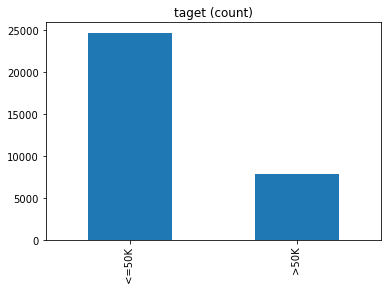

In [7]:
# Checking target variable for inbalance
label_count=df['Income'].value_counts()
print("Class 0:",label_count[0])
print("Class 1:",label_count[1])
print('Proportion:', round(label_count[0]/label_count[1],2),':1')
label_count.plot(kind='bar', title='taget (count)')

from above we can see that the target is inbalanced.

### Check null values

In [8]:
df=df.replace(" ?",np.NaN)

In [9]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

from above we can see that there are no null values.

In [10]:
nan_percentage = df.isna().sum() * 100 / len(df)
missing_percentage = pd.DataFrame({'column_name': df.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage

,column_name,percent_missing
0,Age,0.000000
1,Workclass,5.638821
2,Fnlwgt,0.000000
3,Education,0.000000
4,Education_num,0.000000
5,Marital_status,0.000000
6,Occupation,5.660319
7,Relationship,0.000000
8,Race,0.000000
9,Sex,0.000000


In [11]:
df.dropna().reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Loss Data percentage

In [12]:
print(((32560-30161)/32560)*100)

7.367936117936118


we can see that only 7.36 % data we lost after dropping nan we can afford to drop that much data.

In [13]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Data transformation ussing label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df['Workclass']=le.fit_transform(df['Workclass'])

In [16]:
df['Education']=le.fit_transform(df['Education'])

In [17]:
df['Marital_status']=le.fit_transform(df['Marital_status'])

In [18]:
df['Occupation']=le.fit_transform(df['Occupation'])

In [19]:
df['Relationship']=le.fit_transform(df['Relationship'])

In [20]:
df['Race']=le.fit_transform(df['Race'])

In [21]:
df['Sex']=le.fit_transform(df['Sex'])

In [22]:
df['Native_country']=le.fit_transform(df['Native_country'])

In [23]:
df['Income']=le.fit_transform(df['Income'])

### splitting data into feature and lable

In [24]:
x=df.drop(columns=['Income'],axis=1)
y=df.Income

### Data distribution

<AxesSubplot:xlabel='Age', ylabel='Income'>

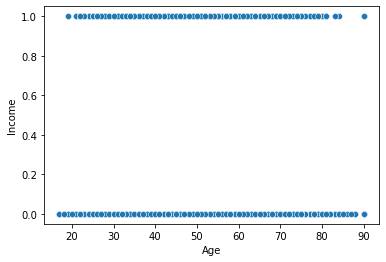

In [25]:
sns.scatterplot(x='Age',y='Income',data=df)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

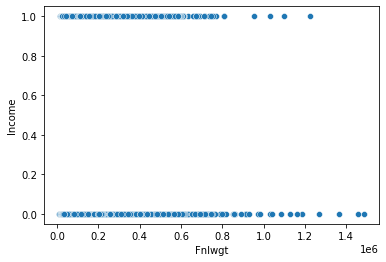

In [26]:
sns.scatterplot(x='Fnlwgt',y='Income',data=df)

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

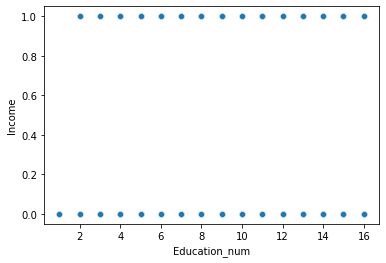

In [27]:
sns.scatterplot(x='Education_num',y='Income',data=df)

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

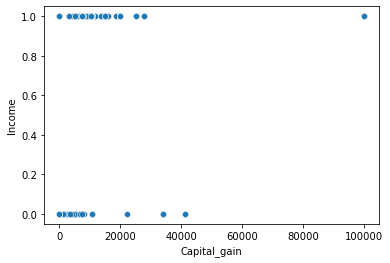

In [28]:
sns.scatterplot(x='Capital_gain',y='Income',data=df)

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

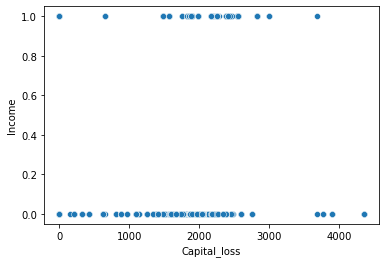

In [29]:
sns.scatterplot(x='Capital_loss',y='Income',data=df)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

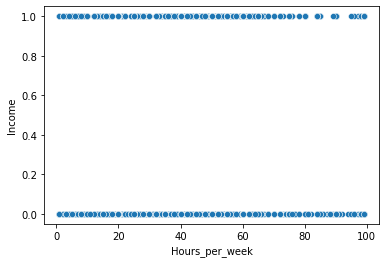

In [30]:
sns.scatterplot(x='Hours_per_week',y='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Education'>

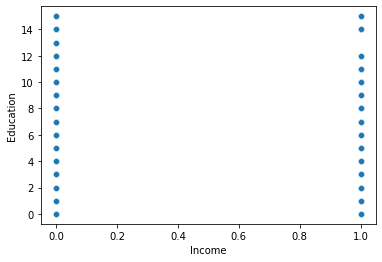

In [31]:
sns.scatterplot(y='Education',x='Income',data=df)

### Data distribution

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

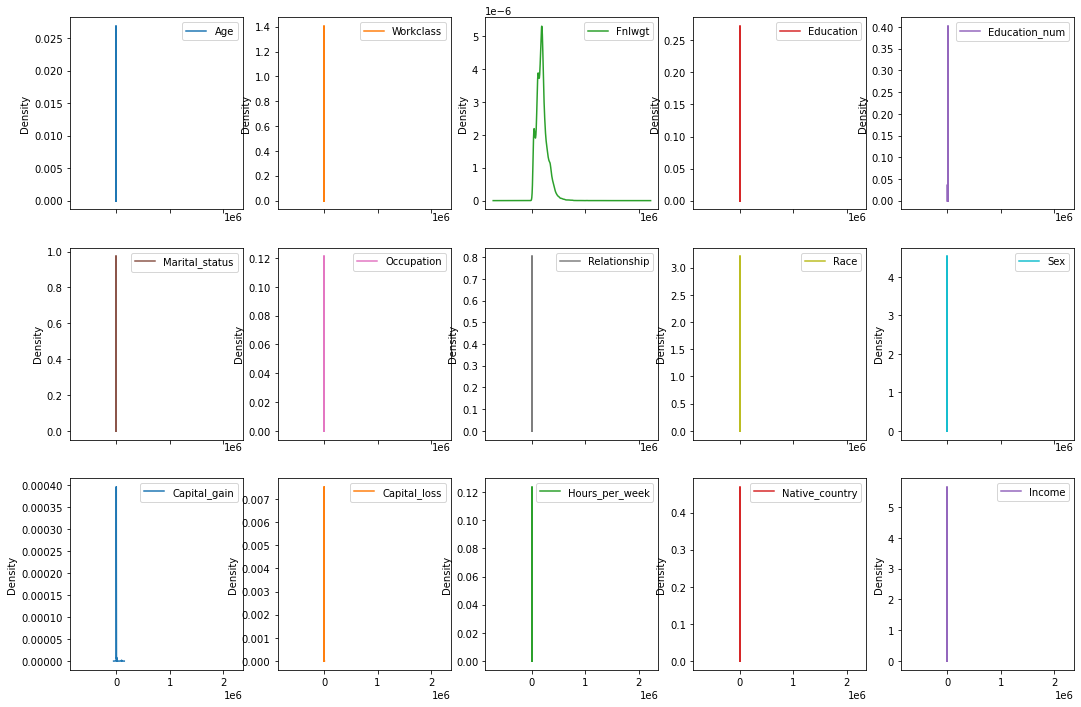

In [32]:
df.plot(kind='density',subplots=True,layout=(3,5),figsize=(18,12))

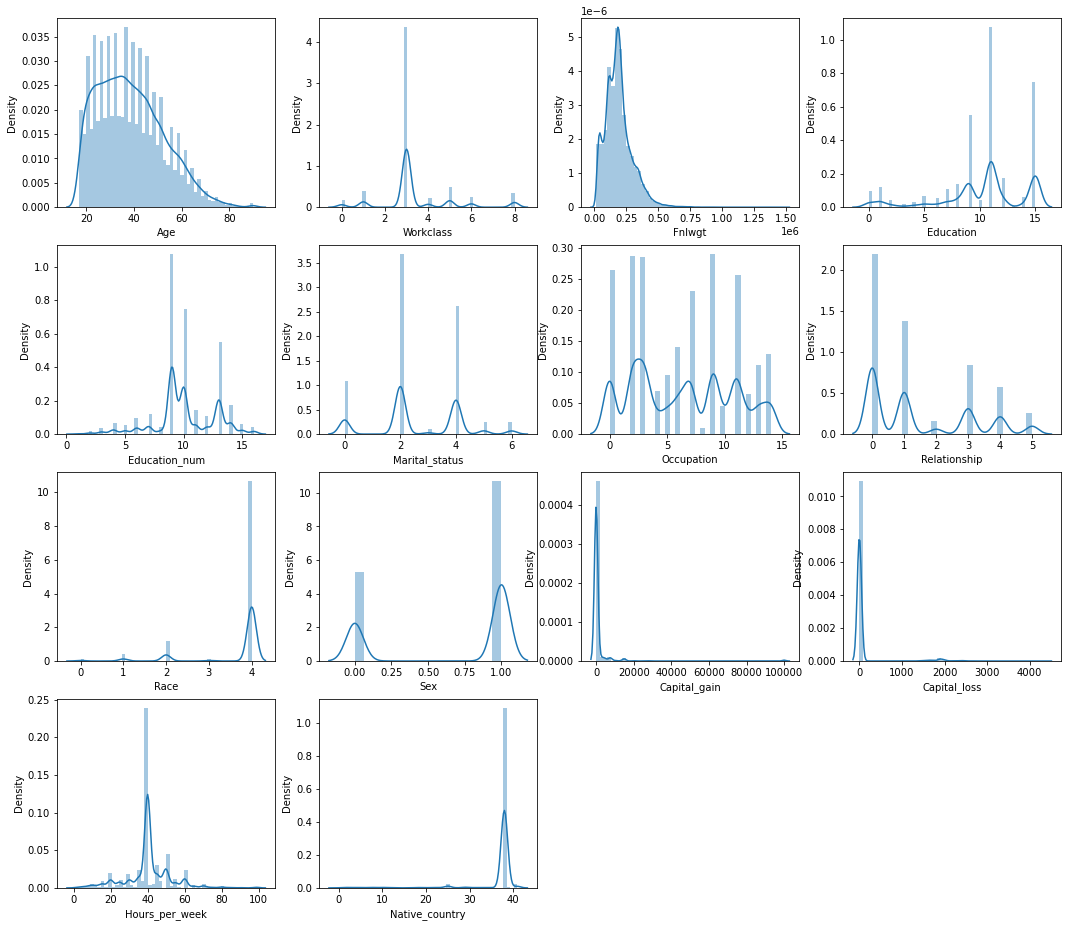

In [33]:
plt.figure(figsize=(18,16))
plotnumber=1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

From above distribution we can see that there is skewness in data.

### Check skewness

In [34]:
x.skew().sort_values(ascending=False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Workclass          1.167293
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Occupation         0.126702
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Education         -0.934063
Race              -2.435332
Native_country    -4.205890
dtype: float64

In [35]:
# power transform function to remove skewness
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [36]:
# Cross checking the skewness
sk=x.skew()
sk[np.abs(sk)>0.5].all()

True

In [37]:
sk[np.abs(sk)<0.5].all()

True

from above we can see that the skewness is removed.

### Data distribution

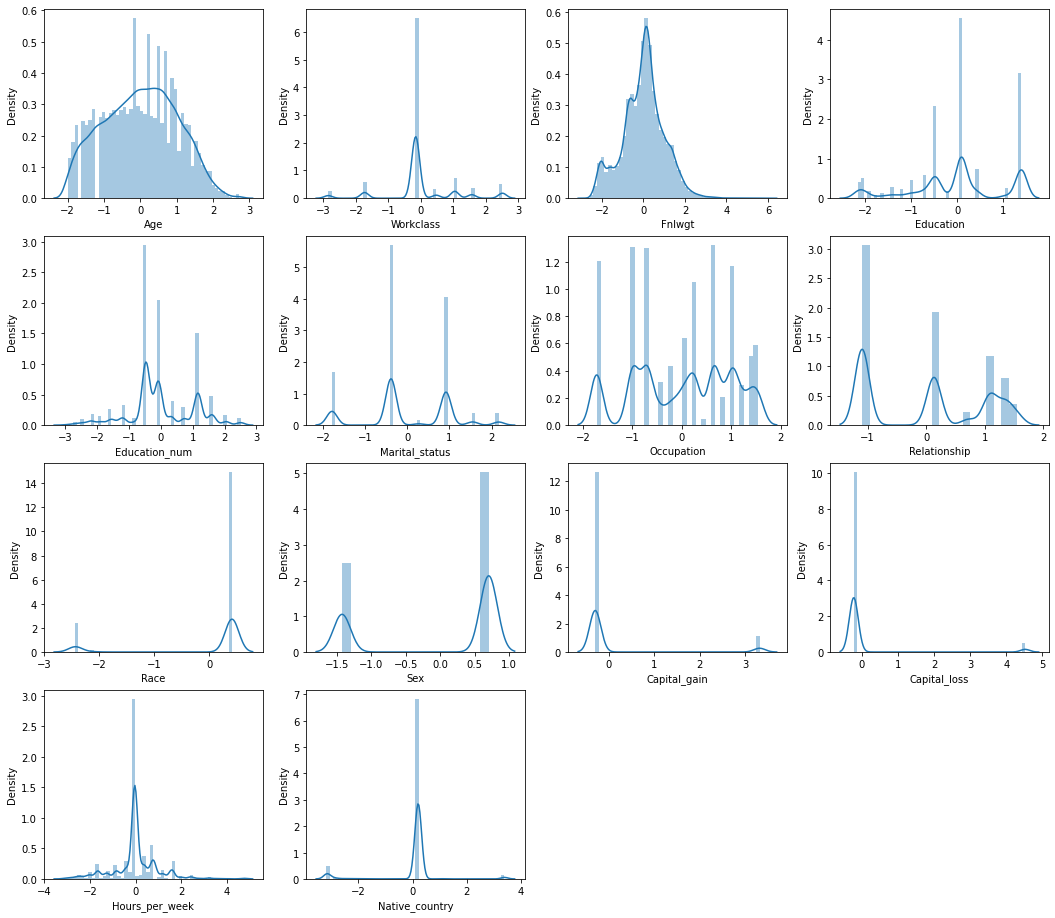

In [38]:
plt.figure(figsize=(18,16))
plotnumber=1
for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

### Checking outliers

<AxesSubplot:>

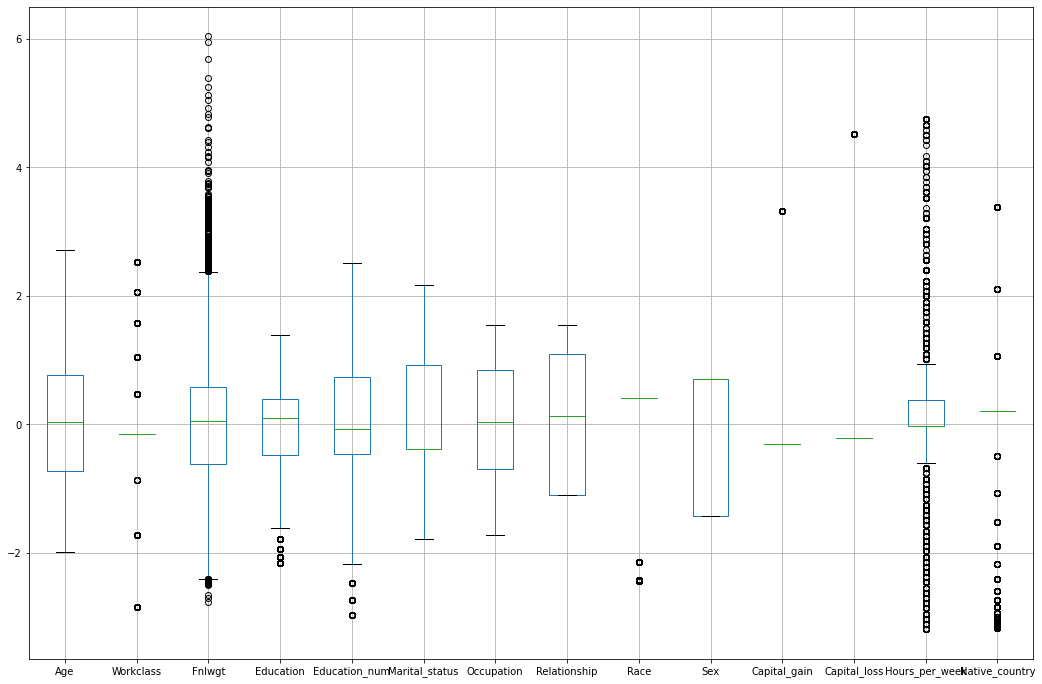

In [39]:
plt.figure(figsize=(18,12))
x.boxplot()

From above distribution we can see that there are lot of outliers using zscore technique.

### Zscore 

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(32560, 14)

In [41]:
Threshold=3
print(np.where(z>4))

(array([   22,    31,    51, ..., 32468, 32499, 32530], dtype=int64), array([11, 11, 11, ..., 12, 11, 12], dtype=int64))


In [42]:
x_new=x[(z<4).all(axis=1)]

In [43]:
print(x.shape)
print(x_new.shape)

(32560, 14)
(30890, 14)


In [44]:
# Data loss
print((32560-30890)/32560)

0.05128992628992629


In [45]:
x=x_new
x.shape

(30890, 14)

### Checking correlation using heatmap

In [46]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,-0.028156,-0.043159,0.028184,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,-0.010508,-0.019358,-0.028156,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,-0.043159,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,0.028184,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.000569,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995


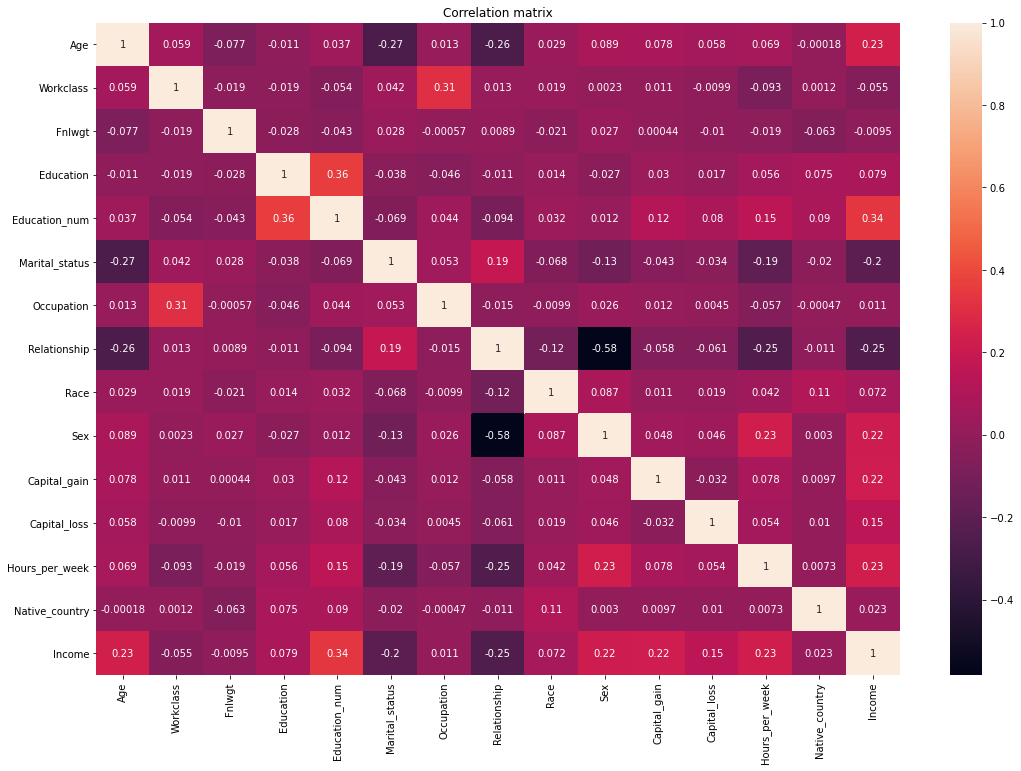

In [47]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

From above heatmap we can see that there is a correaltion between features and label.

In [48]:
df.corr()['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Native_country    0.023159
Occupation        0.010777
Fnlwgt           -0.009481
Workclass        -0.055098
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

### Data scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.90181956,  1.04716809, -1.09620253, ..., -1.        ,
        -2.29163822,  0.20944461],
       [ 0.1157628 , -0.15748847,  0.40194296, ..., -1.        ,
        -0.00548148,  0.20944461],
       [ 1.07356065, -0.15748847,  0.56678732, ..., -1.        ,
        -0.00548148,  0.20944461],
       ...,
       [ 1.34264988, -0.15748847, -0.2205072 , ..., -1.        ,
        -0.00548148,  0.20944461],
       [-1.3394232 , -0.15748847,  0.27405612, ..., -1.        ,
        -1.69914345,  0.20944461],
       [ 1.01723012,  0.4756006 ,  0.98909381, ..., -1.        ,
        -0.00548148,  0.20944461]])

### Creating train test split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1253)

ValueError: Found input variables with inconsistent numbers of samples: [30890, 32560]

### Removing inbalance using oversampling

In [ ]:
# Smote technique
from imblearn.over_sampling import SMOTE
sm=SMOTE()
over_sampling=SMOTE(0.75)
